# Lab 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy.io import wavfile

## Question 1
Take a 5 second sample of your speech, sampled at 8 kHz, and perform linear predictive coding
with predictor lengths 4,8,16 on it. Calculate the processing gain in each case.

In [ ]:
rate, signal = wavfile.read("./output5.wav")
signal = signal[:,0]
print(signal.size)

40000


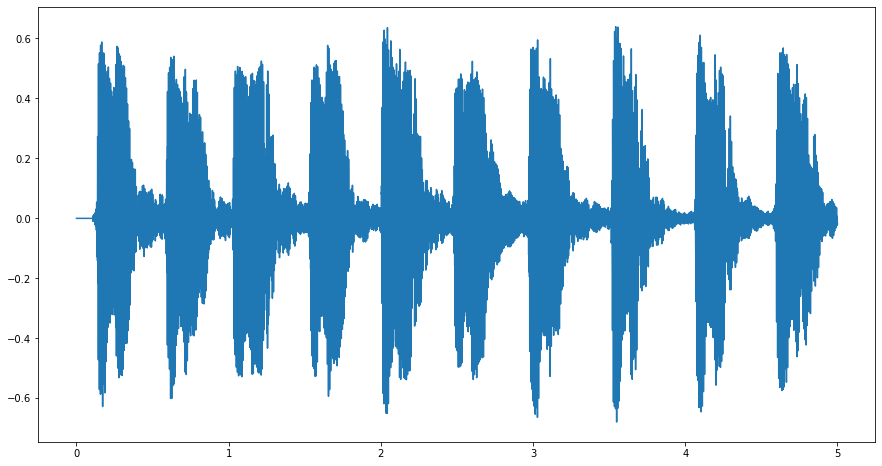

In [ ]:
time_axis = np.arange(0,len(signal)/rate, 1/rate)

plt.figure(figsize=(15,8))
plt.plot(time_axis,signal)
plt.show()

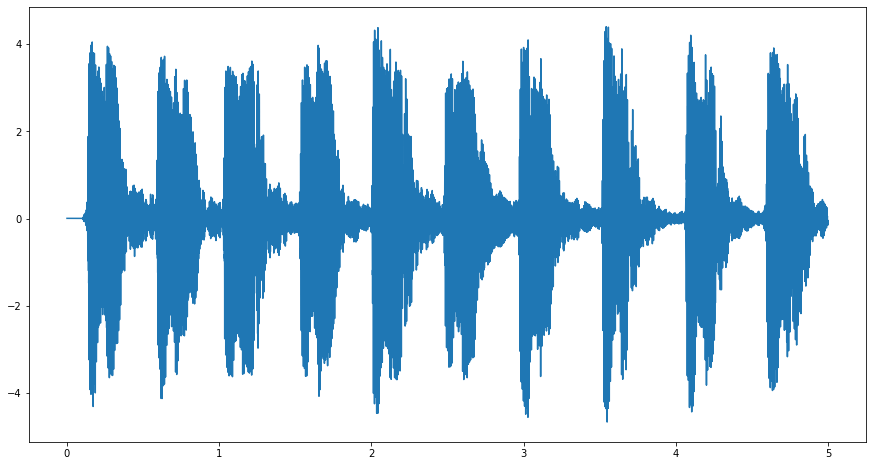

In [ ]:
signal = (signal - np.mean(signal))/ np.std(signal)

plt.figure(figsize=(15,8))
plt.plot(time_axis,signal)
plt.show()

In [ ]:
def pred_code(pred_len):
  win_size = int((40/1000)*8000)  
  win_no = int(len(signal)/win_size)

  proc_gain = 0
  signal_predicted= np.zeros((len(signal)))

  for window in range(int(win_no)):
    signal_window = signal[window*win_size: (window + 1)*win_size]

    R = np.zeros((pred_len, pred_len))
    q = np.zeros((pred_len,1))
    for i in range(len(signal_window)-(pred_len)):
      x = np.reshape(signal_window[i:i+pred_len], (pred_len,1))
      R_p = np.matmul(x,x.T)
      R = R + R_p
      q_p = signal_window[i:i+pred_len]* signal_window[i+pred_len]
      q = q + np.reshape(q_p, (pred_len,1))

    w_o=np.linalg.solve(R,q)

    sig_pred = np.zeros((len(signal_window)))
    for i in range(pred_len):
      sig_pred[i] = signal_window[i]
    for i in range(len(signal_window)-pred_len):
      x = signal_window[i:i+pred_len]
      sig_pred[i+pred_len]= np.matmul(x,w_o)

    signal_predicted[window*win_size: (window+1)*win_size] = sig_pred
  
  err = signal - signal_predicted
  proc_gain = np.var(signal)/np.var(err)

  print(f"Processing gain: {proc_gain:.3f}")
  
  plt.figure(figsize=(15,8))
  plt.subplot(311)
  plt.plot(signal)
  plt.subplot(312)
  plt.plot(signal_predicted)
  plt.subplot(313)
  plt.plot(signal_predicted)
  plt.plot(signal)
  plt.show()

Processing gain: 16.334


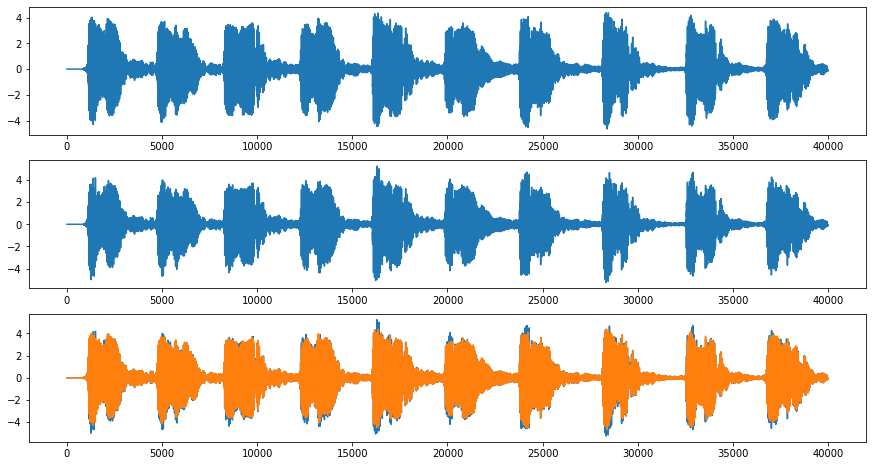

In [ ]:
pred_code(4)

Processing gain: 36.167


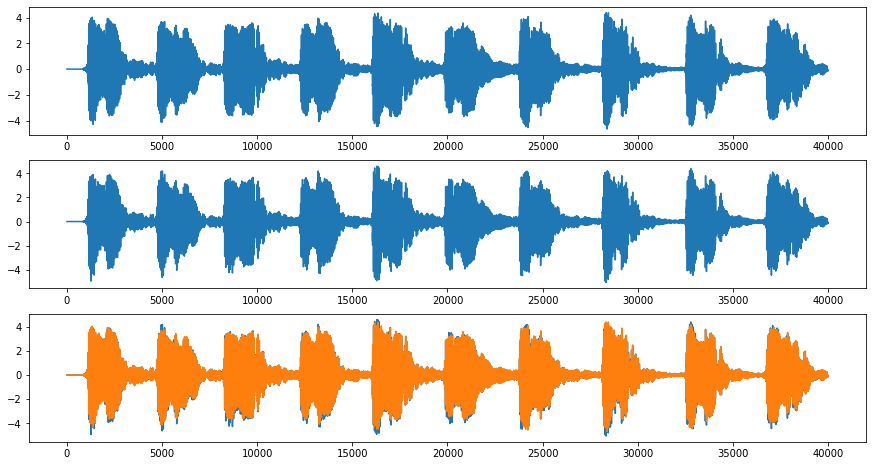

In [ ]:
pred_code(8)

Processing gain: 51.136


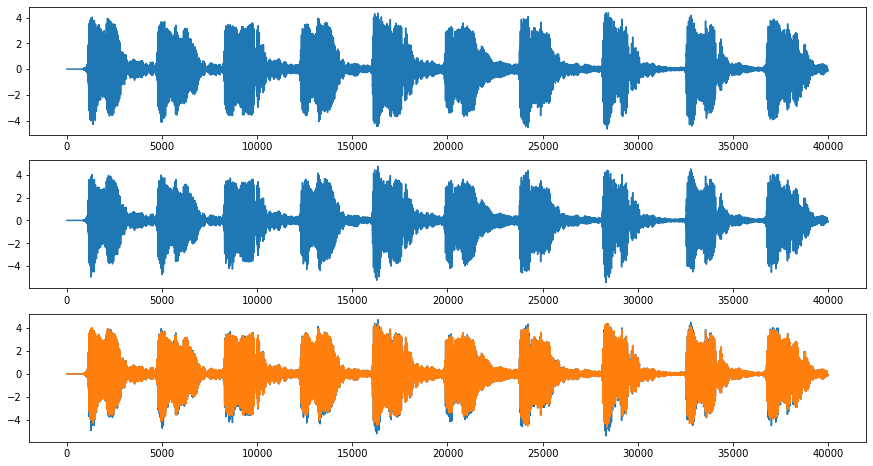

In [ ]:
pred_code(16)